In [8]:
pip install scikit-learn

     ---------------------------------------- 8.3/8.3 MB 1.4 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import numpy as np
import pandas as pd
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import h5py

from sklearn import model_selection, feature_selection, linear_model, metrics

In [10]:
print("Import data")

X = pd.read_hdf('model_pp1.h5', key='data')
X.reset_index(drop=True, inplace=True)

X2 = pd.read_hdf('model_pp2.h5', key='data')
X2.reset_index(drop=True, inplace=True)

X = X.join(X2)

X.drop('window_id', axis=1, inplace=True)

y = X['Label_<lambda>']
X.drop('Label_<lambda>', axis=1, inplace=True)

labels = np.load("labels.npy", allow_pickle=True)

# print(X)
# print(y)
print(X.columns.values)
print(labels)


Import data
['Sport_nunique' 'DstAddr_nunique' 'Dport_nunique' 'Dur_sum' 'Dur_mean'
 'Dur_std' 'Dur_max' 'Dur_median' 'TotBytes_sum' 'TotBytes_mean'
 'TotBytes_std' 'TotBytes_max' 'TotBytes_median' 'SrcBytes_sum'
 'SrcBytes_mean' 'SrcBytes_std' 'SrcBytes_max' 'SrcBytes_median'
 'Sport_RU' 'DstAddr_RU' 'Dport_RU']
['flow=Background' 'flow=From-Norma' 'flow=To-Backgro' 'flow=From-Backg'
 'flow=To-Normal-' 'flow=Normal-V52' 'flow=From-Botne']


In [11]:
y_bin6 = y == 6
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y_bin6, test_size=0.33, random_state=123456)
# y_train_bin6 = y_train==6
# y_test_bin6 = y_test==6

print("y", np.unique(y, return_counts=True))
print("y_train", np.unique(y_train, return_counts=True))
print("y_test", np.unique(y_test, return_counts=True))


y (array([0, 1, 2, 3, 4, 6], dtype=int64), array([60753,    37,   732,     9,     3,    17], dtype=int64))
y_train (array([False,  True]), array([41225,    14], dtype=int64))
y_test (array([False,  True]), array([20309,     3], dtype=int64))


In [12]:
# Embedded Method
print("Logistic Regression")

clf = linear_model.LogisticRegression(penalty='l2', C=1.0, random_state=123456,
                                      multi_class="auto", class_weight=None, solver="lbfgs", max_iter=1000, verbose=1)
clf.fit(X_train, y_train)
# print(clf.classes_)
print(clf.coef_)
print(clf.intercept_)


Logistic Regression


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[ 0.08693088 -0.14357974  0.10806683 -0.40604544 -0.47959272  0.32673067
   0.03409715 -0.49091197 -0.06640223 -0.0263263  -0.13675735 -0.11106528
  -0.01364767  1.11019835 -0.03292357 -0.21912216 -0.39458129 -0.02941893
  -0.33412331 -0.17099083 -0.19233075]]
[-9.35099861]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [13]:
y_pred = clf.predict(X_test)
# y_pred_bin6 = y_pred==6
# print(clf.predict_proba(X_test))
print("accuracy score = ", metrics.balanced_accuracy_score(y_test, y_pred))
precision, recall, fbeta_score, support = metrics.precision_recall_fscore_support(
    y_test, y_pred)
print("precision = ", precision[1])
print("recall = ", recall[1])
print("fbeta_score = ", fbeta_score[1])
print("support = ", support[1])


accuracy score =  0.6666420470399002
precision =  0.5
recall =  0.3333333333333333
fbeta_score =  0.4
support =  3


In [14]:
clf = linear_model.LogisticRegression(penalty='l2', C=1.0, random_state=123456,
                                      multi_class="auto", class_weight='balanced', solver="lbfgs", max_iter=1000, verbose=1)
clf.fit(X_train, y_train)
# print(clf.classes_)
print(clf.coef_)
print(clf.intercept_)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[ -0.02028136  -2.45690181   2.6419635   -7.90466162 -12.1604604
    3.70523437  -3.64010134   1.6166629   -0.97884952  -0.06508729
    0.14908056  -0.80516112   0.47388551   4.86735334  -1.47342798
   -4.6261162   -1.31108348  -1.73963069  -1.35562315   0.62664524
   -1.02944   ]]
[-8.57001988]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


In [15]:
y_pred = clf.predict(X_test)
# y_pred_bin6 = y_pred==6
# print(clf.predict_proba(X_test))
print("accuracy score = ", metrics.balanced_accuracy_score(y_test, y_pred))
precision, recall, fbeta_score, support = metrics.precision_recall_fscore_support(
    y_test, y_pred)
print("precision = ", precision[1])
print("recall = ", recall[1])
print("fbeta_score = ", fbeta_score[1])
print("support = ", support[1])


accuracy score =  0.9891181249692255
precision =  0.006741573033707865
recall =  1.0
fbeta_score =  0.013392857142857142
support =  3


In [16]:
clf = linear_model.LogisticRegression(penalty='l2', C=1.0, random_state=123456, multi_class="auto", class_weight={
                                      0: 0.5, 1: 0.5}, solver="lbfgs", max_iter=1000, verbose=1)
clf.fit(X_train, y_train)
# print(clf.classes_)
print(clf.coef_)
print(clf.intercept_)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


[[ 0.09263308 -0.08320962  0.04804273 -0.23809009 -0.31926935  0.28615104
   0.01683891 -0.36880995 -0.02585847 -0.01615308 -0.07982637 -0.0610237
  -0.01029552  0.58483741 -0.02031429 -0.12279174 -0.19410377 -0.01828906
  -0.33040312 -0.1684086  -0.19372713]]
[-9.25012648]


In [17]:
y_pred = clf.predict(X_test)
# y_pred_bin6 = y_pred==6
# print(clf.predict_proba(X_test))
print("accuracy score = ", metrics.balanced_accuracy_score(y_test, y_pred))
precision, recall, fbeta_score, support = metrics.precision_recall_fscore_support(
    y_test, y_pred)
print("precision = ", precision[1])
print("recall = ", recall[1])
print("fbeta_score = ", fbeta_score[1])
print("support = ", support[1])


accuracy score =  0.6666420470399002
precision =  0.5
recall =  0.3333333333333333
fbeta_score =  0.4
support =  3


In [18]:
print("Logistic Regression Cross Validation")


def apply_logreg_cross_validation(X, y, svc_args={'penalty': 'l2', 'C': 1.0, 'random_state': 123456, 'multi_class': "auto", 'class_weight': None, 'solver': "lbfgs", 'max_iter': 1000, 'verbose': 1}):
    clf = linear_model.LogisticRegression(**svc_args)
    cv = model_selection.ShuffleSplit(
        n_splits=10, test_size=0.1, random_state=123456)
    scores = model_selection.cross_validate(clf, X, y, cv=cv, scoring=[
                                            'precision', 'recall', 'f1'], return_train_score=True)
    print(scores)
    return [np.mean(scores['test_precision']), np.mean(scores['test_recall']), np.mean(scores['test_f1'])]


tab_class_weight = np.linspace(0, 0.1, 10)
print(tab_class_weight)


Logistic Regression Cross Validation
[0.         0.01111111 0.02222222 0.03333333 0.04444444 0.05555556
 0.06666667 0.07777778 0.08888889 0.1       ]


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.17709231, 0.09391665, 0.0849576 , 0.14093423, 0.19696546,
       0.20783114, 0.27203274, 0.20861983, 0.16200542, 0.120507  ]), 'score_time': array([0.00892043, 0.01291776, 0.00967383, 0.03022218, 0.01989889,
       0.02026248, 0.02345061, 0.02283335, 0.01390958, 0.01691198]), 'test_precision': array([0.00072745, 0.        , 0.00024248, 0.00048497, 0.00024248,
       0.        , 0.00048497, 0.00024248, 0.00024248, 0.        ]), 'train_precision': array([0.00029638, 0.00037721, 0.00035026, 0.00032332, 0.00035026,
       0.00037721, 0.00032332, 0.00035026, 0.00035026, 0.00037721]), 'test_recall': array([1., 0., 1., 1., 1., 0., 1., 1., 1., 0.]), 'train_recall': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'test_f1': array([0.00145384, 0.        , 0.00048485, 0.00096946, 0.00048485,
       0.        , 0.00096946, 0.00048485, 0.00048485, 0.        ]), 'train_f1': array([0.00059258, 0.00075413, 0.00070028, 0.00064643, 0.00070028,
       0.00075413, 0.00064643, 0.0007

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.13478088, 0.19123483, 0.18084788, 0.14990115, 0.13062263,
       0.12477994, 0.15629077, 0.1420083 , 0.18146944, 0.1763773 ]), 'score_time': array([0.01350617, 0.01265597, 0.01287508, 0.01289415, 0.0107286 ,
       0.01279998, 0.01206398, 0.0127418 , 0.01365972, 0.01502585]), 'test_precision': array([0.1       , 0.        , 0.        , 0.05882353, 0.        ,
       0.        , 0.11764706, 0.03448276, 0.        , 0.        ]), 'train_precision': array([0.08219178, 0.03867403, 0.07142857, 0.04444444, 0.0625    ,
       0.03954802, 0.02840909, 0.03174603, 0.05035971, 0.04      ]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.53846154, 0.5       , 0.53846154,
       0.5       , 0.41666667, 0.46153846, 0.53846154, 0.5       ]), 'test_f1': array([0.15384615, 0.        , 0.        , 0.10526316, 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.12478542, 0.35817146, 0.14435863, 0.17508578, 0.12680674,
       0.13374877, 0.33825254, 0.14034915, 0.11594605, 0.11898017]), 'score_time': array([0.01131868, 0.02566552, 0.00945425, 0.01060605, 0.00931764,
       0.01011872, 0.01314592, 0.00928831, 0.00995684, 0.01087189]), 'test_precision': array([0.2       , 0.        , 0.        , 0.09090909, 0.        ,
       0.        , 0.33333333, 0.125     , 0.        , 0.        ]), 'train_precision': array([0.2       , 0.14634146, 0.24      , 0.12195122, 0.22222222,
       0.14634146, 0.10526316, 0.11111111, 0.13636364, 0.13636364]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.45454545, 0.42857143, 0.46153846, 0.41666667, 0.46153846,
       0.42857143, 0.33333333, 0.38461538, 0.46153846, 0.42857143]), 'test_f1': array([0.25      , 0.        , 0.        , 0.15384615, 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.12264252, 0.21233702, 0.146065  , 0.16945887, 0.14760113,
       0.17749023, 0.16289353, 0.27514815, 0.12593579, 0.12189794]), 'score_time': array([0.01027346, 0.02446532, 0.01188135, 0.0120976 , 0.01024151,
       0.01221728, 0.01026297, 0.01155949, 0.00812769, 0.0099678 ]), 'test_precision': array([0.25      , 0.        , 0.        , 0.14285714, 0.        ,
       0.        , 0.5       , 0.5       , 0.        , 0.        ]), 'train_precision': array([0.33333333, 0.22222222, 0.33333333, 0.23809524, 0.33333333,
       0.22222222, 0.16666667, 0.18518519, 0.3       , 0.22222222]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.45454545, 0.42857143, 0.46153846, 0.41666667, 0.46153846,
       0.42857143, 0.33333333, 0.38461538, 0.46153846, 0.42857143]), 'test_f1': array([0.28571429, 0.        , 0.        , 0.22222222, 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 

{'fit_time': array([0.14164996, 0.33630586, 0.15434313, 0.14055061, 0.14540124,
       0.16569901, 0.14435983, 0.14859366, 0.14206076, 0.20863247]), 'score_time': array([0.01385498, 0.02646351, 0.01093197, 0.00965548, 0.01039028,
       0.00969672, 0.00933743, 0.00836682, 0.01537061, 0.01614332]), 'test_precision': array([0.25      , 0.        , 0.        , 0.16666667, 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_precision': array([0.38461538, 0.54545455, 0.5       , 0.33333333, 0.42857143,
       0.5       , 0.25      , 0.38461538, 0.33333333, 0.5       ]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.45454545, 0.42857143, 0.46153846, 0.41666667, 0.46153846,
       0.42857143, 0.33333333, 0.38461538, 0.46153846, 0.42857143]), 'test_f1': array([0.28571429, 0.        , 0.        , 0.25      , 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 

{'fit_time': array([0.18910432, 0.2087996 , 0.34650493, 0.2241292 , 0.18855667,
       0.33253407, 0.36261439, 0.26558375, 0.29080701, 0.32514024]), 'score_time': array([0.0170033 , 0.02911615, 0.01354885, 0.01413488, 0.01362967,
       0.02300453, 0.01607323, 0.01727819, 0.01482654, 0.02852416]), 'test_precision': array([0.25, 0.  , 0.  , 0.2 , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  ]), 'train_precision': array([0.45454545, 0.85714286, 0.75      , 0.41666667, 0.5       ,
       0.85714286, 0.66666667, 0.83333333, 0.66666667, 0.85714286]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.45454545, 0.42857143, 0.46153846, 0.41666667, 0.46153846,
       0.42857143, 0.33333333, 0.38461538, 0.46153846, 0.42857143]), 'test_f1': array([0.28571429, 0.        , 0.        , 0.28571429, 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_f1

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 

{'fit_time': array([0.30775547, 0.2119453 , 0.35325599, 0.22205663, 0.19802976,
       0.19980597, 0.19731331, 0.18305826, 0.200737  , 0.20986509]), 'score_time': array([0.02732968, 0.02085805, 0.02050233, 0.0134058 , 0.01663399,
       0.01892686, 0.01254487, 0.01348805, 0.01438236, 0.01528788]), 'test_precision': array([0.33333333, 0.        , 0.        , 0.25      , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_precision': array([0.83333333, 1.        , 0.85714286, 0.83333333, 0.75      ,
       1.        , 1.        , 1.        , 0.75      , 1.        ]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.45454545, 0.42857143, 0.46153846, 0.41666667, 0.46153846,
       0.42857143, 0.33333333, 0.38461538, 0.46153846, 0.42857143]), 'test_f1': array([0.33333333, 0.        , 0.        , 0.33333333, 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 

{'fit_time': array([0.20121861, 0.18638873, 0.17913651, 0.2181592 , 0.22398829,
       0.22477508, 0.2077992 , 0.22372913, 0.20977616, 0.25028992]), 'score_time': array([0.01986361, 0.02524567, 0.01702166, 0.01563621, 0.0157671 ,
       0.01702785, 0.01788259, 0.01103139, 0.01225495, 0.01665258]), 'test_precision': array([0.5       , 0.        , 0.        , 0.33333333, 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_precision': array([0.83333333, 1.        , 1.        , 0.83333333, 0.85714286,
       1.        , 1.        , 1.        , 1.        , 1.        ]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.45454545, 0.42857143, 0.46153846, 0.41666667, 0.46153846,
       0.42857143, 0.33333333, 0.38461538, 0.46153846, 0.42857143]), 'test_f1': array([0.4, 0. , 0. , 0.4, 0. , 0. , 1. , 1. , 0. , 0. ]), 'train_f1': array([

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 

{'fit_time': array([0.27392912, 0.27876735, 0.26651764, 0.30989122, 0.27735257,
       0.30812311, 0.31016898, 0.24191713, 0.27772403, 0.36630368]), 'score_time': array([0.01686478, 0.03421378, 0.01137042, 0.01530099, 0.01733232,
       0.01232052, 0.01378918, 0.01395249, 0.01823163, 0.01996517]), 'test_precision': array([0.5       , 0.        , 0.        , 0.33333333, 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_precision': array([0.83333333, 1.        , 1.        , 0.83333333, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.45454545, 0.42857143, 0.46153846, 0.41666667, 0.46153846,
       0.42857143, 0.33333333, 0.38461538, 0.46153846, 0.42857143]), 'test_f1': array([0.4, 0. , 0. , 0.4, 0. , 0. , 1. , 1. , 0. , 0. ]), 'train_f1': array([

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 

{'fit_time': array([0.22632074, 0.26466656, 0.18861842, 0.2310617 , 0.24294448,
       0.37282419, 0.32375693, 0.32614279, 0.27753067, 0.2864852 ]), 'score_time': array([0.01725531, 0.02390957, 0.01675272, 0.01317763, 0.02677774,
       0.02717519, 0.02254868, 0.02577353, 0.01695108, 0.01378465]), 'test_precision': array([1.        , 0.        , 0.        , 0.33333333, 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_precision': array([0.83333333, 1.        , 1.        , 0.83333333, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.45454545, 0.42857143, 0.46153846, 0.41666667, 0.46153846,
       0.42857143, 0.33333333, 0.38461538, 0.46153846, 0.42857143]), 'test_f1': array([0.5, 0. , 0. , 0.4, 0. , 0. , 1. , 1. , 0. , 0. ]), 'train_f1': array([

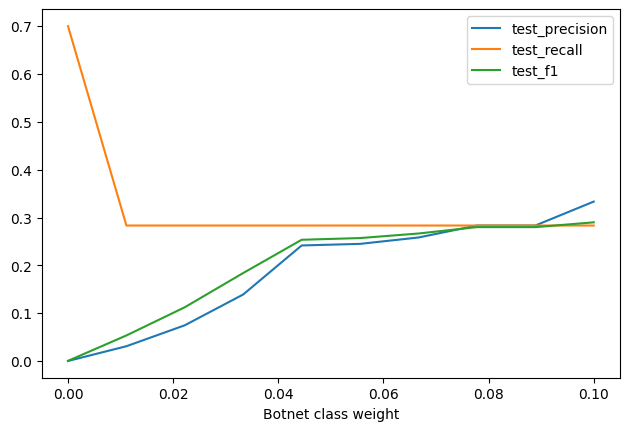

In [19]:
tab_score = np.array([apply_logreg_cross_validation(X_train, y_train, {'penalty': 'l2', 'C': 1.0, 'random_state': 123456, 'multi_class': "auto", 'class_weight': {
                     0: w, 1: 1-w}, 'solver': "lbfgs", 'max_iter': 1000, 'verbose': 0}) for w in tab_class_weight])
print(tab_score)

plt.plot(tab_class_weight, tab_score[:, 0])
plt.plot(tab_class_weight, tab_score[:, 1])
plt.plot(tab_class_weight, tab_score[:, 2])
plt.legend(["test_precision", "test_recall", "test_f1"])
plt.xlabel("Botnet class weight")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("cross_validation_class_weight.pdf", format="pdf")
plt.show()


In [20]:
def apply_logreg_cross_validation_coeff(X, y, svc_args={'penalty': 'l2', 'C': 1.0, 'random_state': 123456, 'multi_class': "auto", 'class_weight': None, 'solver': "lbfgs", 'max_iter': 1000, 'verbose': 1}):
    clf = linear_model.LogisticRegression(**svc_args)
    # cv = model_selection.ShuffleSplit(n_splits=10, test_size=0.1, random_state=123456) #for l2
    cv = model_selection.ShuffleSplit(
        n_splits=3, test_size=0.1, random_state=123456)  # for l1
    scores = model_selection.cross_validate(clf, X, y, cv=cv, scoring=[
                                            'precision', 'recall', 'f1'], return_train_score=True, return_estimator=True)
    print(scores)
    return [np.mean(scores['test_precision']), np.mean(scores['test_recall']), np.mean(scores['test_f1']), np.mean([model.coef_[0] for model in scores['estimator']], axis=0)]


tab_C = np.logspace(-2, 6, 9)
tab_logC = np.log10(tab_C)
print(tab_C)
print(tab_logC)


[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]
[-2. -1.  0.  1.  2.  3.  4.  5.  6.]


In [40]:
tab_score = np.array([apply_logreg_cross_validation_coeff(X_train, y_train, {'penalty': 'l2', 'C': C, 'random_state': 123456, 'multi_class': "auto", 'class_weight': {0: 0.044, 1: 1-0.044}, 'solver': "lbfgs", 'max_iter': 1000, 'verbose': 0}) for C in tab_C])
print(tab_score)

plt.plot(tab_logC, tab_score[:, 0])
plt.plot(tab_logC, tab_score[:, 1])
plt.plot(tab_logC, tab_score[:, 2])
plt.legend(["test_precision", "test_recall", "test_f1"])   
plt.xlabel("log(C)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("cross_validation_C.pdf", format="pdf")
plt.show()


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 

{'fit_time': array([0.1148293 , 0.0672102 , 0.07114053]), 'score_time': array([0.01436329, 0.01147676, 0.01103163]), 'estimator': [LogisticRegression(C=0.01, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=0.01, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=0.01, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456)], 'test_precision': array([1., 0., 0.]), 'train_precision': array([1., 1., 1.]), 'test_recall': array([0.33333333, 0.        , 0.        ]), 'train_recall': array([0.45454545, 0.42857143, 0.46153846]), 'test_f1': array([0.5, 0. , 0. ]), 'train_f1': array([0.625     , 0.6       , 0.63157895])}


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


{'fit_time': array([0.12844753, 0.15187263, 0.11183691]), 'score_time': array([0.01687574, 0.01554918, 0.01067758]), 'estimator': [LogisticRegression(C=0.1, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=0.1, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=0.1, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456)], 'test_precision': array([0.25, 0.  , 0.  ]), 'train_precision': array([0.38461538, 0.42857143, 0.4       ]), 'test_recall': array([0.33333333, 0.        , 0.        ]), 'train_recall': array([0.45454545, 0.42857143, 0.46153846]), 'test_f1': array([0.28571429, 0.        , 0.        ]), 'train_f1': array([0.41666667, 0.42857143, 0.42857143])}


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


{'fit_time': array([0.18073654, 0.19441795, 0.17232203]), 'score_time': array([0.01104641, 0.01578164, 0.01523376]), 'estimator': [LogisticRegression(class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456)], 'test_precision': array([0.25, 0.  , 0.  ]), 'train_precision': array([0.38461538, 0.54545455, 0.46153846]), 'test_recall': array([0.33333333, 0.        , 0.        ]), 'train_recall': array([0.45454545, 0.42857143, 0.46153846]), 'test_f1': array([0.28571429, 0.        , 0.        ]), 'train_f1': array([0.41666667, 0.48      , 0.46153846])}


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.38782191, 0.83556294, 0.66922998]), 'score_time': array([0.01561546, 0.02094293, 0.01532793]), 'estimator': [LogisticRegression(C=10.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=10.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=10.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456)], 'test_precision': array([0.5, 0. , 0. ]), 'train_precision': array([0.46153846, 0.46666667, 0.63636364]), 'test_recall': array([0.33333333, 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.53846154]), 'test_f1': array([0.4, 0. , 0. ]), 'train_f1': array([0.5       , 0.48275862, 0.58333333])}


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.74944711, 0.87523532, 0.98928285]), 'score_time': array([0.01290417, 0.01780939, 0.01731443]), 'estimator': [LogisticRegression(C=100.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=100.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=100.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456)], 'test_precision': array([0.5, 0. , 0. ]), 'train_precision': array([0.4   , 0.35  , 0.4375]), 'test_recall': array([0.33333333, 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.53846154]), 'test_f1': array([0.4, 0. , 0. ]), 'train_f1': array([0.46153846, 0.41176471, 0.48275862])}


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([2.69653821, 1.8659327 , 1.83241439]), 'score_time': array([0.01537752, 0.00963473, 0.01498199]), 'estimator': [LogisticRegression(C=1000.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=1000.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=1000.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456)], 'test_precision': array([0.5, 0. , 0. ]), 'train_precision': array([0.3       , 0.25925926, 0.31818182]), 'test_recall': array([0.33333333, 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.53846154]), 'test_f1': array([0.4, 0. , 0. ]), 'train_f1': array([0.38709677, 0.34146341, 0.4       ])}


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

{'fit_time': array([4.23878574, 4.08200002, 3.90913653]), 'score_time': array([0.01441288, 0.01406908, 0.01293182]), 'estimator': [LogisticRegression(C=10000.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=10000.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=10000.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456)], 'test_precision': array([0.5, 0. , 0. ]), 'train_precision': array([0.4       , 0.31818182, 0.38888889]), 'test_recall': array([0.33333333, 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.53846154]), 'test_f1': array([0.4, 0. , 0. ]), 'train_f1': array([0.46153846, 0.38888889, 0.4516129 ])}


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

{'fit_time': array([4.63285947, 4.50170064, 4.71588206]), 'score_time': array([0.01543999, 0.01860666, 0.01570845]), 'estimator': [LogisticRegression(C=100000.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=100000.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456), LogisticRegression(C=100000.0, class_weight={0: 0.044, 1: 0.956}, max_iter=1000,
                   random_state=123456)], 'test_precision': array([0.5, 0. , 0. ]), 'train_precision': array([0.36842105, 0.34615385, 0.47058824]), 'test_recall': array([0.33333333, 0.        , 0.        ]), 'train_recall': array([0.63636364, 0.64285714, 0.61538462]), 'test_f1': array([0.4, 0. , 0. ]), 'train_f1': array([0.46666667, 0.45      , 0.53333333])}


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

{'fit_time': array([5.50009704, 4.80924678, 4.36195922]), 'score_time': array([0.01391697, 0.01074862, 0.02387118]), 'estimator': [LogisticRegression(C=1000000.0, class_weight={0: 0.044, 1: 0.956},
                   max_iter=1000, random_state=123456), LogisticRegression(C=1000000.0, class_weight={0: 0.044, 1: 0.956},
                   max_iter=1000, random_state=123456), LogisticRegression(C=1000000.0, class_weight={0: 0.044, 1: 0.956},
                   max_iter=1000, random_state=123456)], 'test_precision': array([0.5, 0. , 0. ]), 'train_precision': array([0.4       , 0.25714286, 0.40909091]), 'test_recall': array([0.33333333, 0.        , 0.        ]), 'train_recall': array([0.72727273, 0.64285714, 0.69230769]), 'test_f1': array([0.4, 0. , 0. ]), 'train_f1': array([0.51612903, 0.36734694, 0.51428571])}


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (9, 4) + inhomogeneous part.

In [31]:
matrix_coeff = np.stack(tab_score[:, 3], axis=0)
print(matrix_coeff)
print(matrix_coeff.shape)

ax = plt.subplot(111)
NUM_COLORS = matrix_coeff.shape[1]
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
NUM_STYLES = len(LINE_STYLES)
cm = plt.get_cmap('Set1')

for i in range(0, matrix_coeff.shape[1]):
    lines = ax.plot(tab_logC, matrix_coeff[:, i])
    lines[0].set_color(cm(i//NUM_STYLES))
    lines[0].set_linestyle(LINE_STYLES[i % NUM_STYLES])

plt.xlabel("log(C)")
plt.xticks(label=np.log(tab_C))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.95, box.height])
ax.legend(np.arange(0, matrix_coeff.shape[1]),
          loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("cross_validation_C_coeff.pdf", format="pdf")
plt.show()


IndexError: index 3 is out of bounds for axis 1 with size 3

In [32]:
print(matrix_coeff)


tab_C = np.linspace(550, 1000, 10)
print(tab_C)

tab_score = np.array([apply_logreg_cross_validation_coeff(X_train, y_train, {'penalty': 'l2', 'C': C, 'random_state': 123456, 'multi_class': "auto", 'class_weight': {
                     0: 0.044, 1: 1-0.044}, 'solver': "lbfgs", 'max_iter': 1000, 'verbose': 0}) for C in tab_C])
print(tab_score)

plt.plot(tab_C, tab_score[:, 0])
plt.plot(tab_C, tab_score[:, 1])
plt.plot(tab_C, tab_score[:, 2])
plt.legend(["test_precision", "test_recall", "test_f1"])
plt.xlabel("C")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("cross_validation_C.pdf", format="pdf")
plt.show()


NameError: name 'matrix_coeff' is not defined

In [33]:
matrix_coeff = np.stack(tab_score[:, 3], axis=0)
print(matrix_coeff)
print(matrix_coeff.shape)

ax = plt.subplot(111)
NUM_COLORS = matrix_coeff.shape[1]
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
NUM_STYLES = len(LINE_STYLES)
cm = plt.get_cmap('Set1')

for i in range(0, matrix_coeff.shape[1]):
    lines = ax.plot(tab_C, matrix_coeff[:, i])
    lines[0].set_color(cm(i//NUM_STYLES))
    lines[0].set_linestyle(LINE_STYLES[i % NUM_STYLES])

plt.xlabel("C")


IndexError: index 3 is out of bounds for axis 1 with size 3

In [34]:
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.95, box.height])
ax.legend(np.arange(0, matrix_coeff.shape[1]),
          loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("cross_validation_C_coeff.pdf", format="pdf")
plt.show()

tab_C = np.linspace(50, 1000, 20)
print(tab_C)

print(tab_score)

plt.plot(tab_C, tab_score[:, 0])
plt.plot(tab_C, tab_score[:, 1])
plt.plot(tab_C, tab_score[:, 2])
plt.legend(["test_precision", "test_recall", "test_f1"],
           loc='upper right', bbox_to_anchor=(1, 0.9))
plt.xlabel("C")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("cross_validation_C.pdf", format="pdf")
plt.show()


NameError: name 'ax' is not defined

In [35]:
matrix_coeff = np.stack(tab_score[:, 3], axis=0)
print(matrix_coeff)
print(matrix_coeff.shape)

ax = plt.subplot(111)
NUM_COLORS = matrix_coeff.shape[1]
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
NUM_STYLES = len(LINE_STYLES)
cm = plt.get_cmap('Set1')

for i in range(0, matrix_coeff.shape[1]):
    lines = ax.plot(tab_C, matrix_coeff[:, i])
    lines[0].set_color(cm(i//NUM_STYLES))
    lines[0].set_linestyle(LINE_STYLES[i % NUM_STYLES])

plt.xlabel("C")


IndexError: index 3 is out of bounds for axis 1 with size 3

In [36]:
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.95, box.height])
ax.legend(np.arange(0, matrix_coeff.shape[1]),
          loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("cross_validation_C_coeff.pdf", format="pdf")
plt.show()


# tab_C = np.logspace(-2, 6, 9)
tab_C = [1e6]
tab_logC = np.log10(tab_C)
print(tab_C)
print(tab_logC)

tab_score = np.array([apply_logreg_cross_validation_coeff(X_train, y_train, {'penalty': 'l1', 'C': C, 'random_state': 123456, 'multi_class': "auto", 'class_weight': {
                     0: 0.044, 1: 1-0.044}, 'solver': "liblinear", 'max_iter': 1000, 'verbose': 1}) for C in tab_C])
print(tab_score)

plt.plot(tab_logC, tab_score[:, 0])
plt.plot(tab_logC, tab_score[:, 1])
plt.plot(tab_logC, tab_score[:, 2])
plt.legend(["test_precision", "test_recall", "test_f1"])
plt.xlabel("log(C)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("cross_validation_C.pdf", format="pdf")
plt.show()


NameError: name 'ax' is not defined

In [37]:
matrix_coeff = np.stack(tab_score[:, 3], axis=0)
print(matrix_coeff)
print(matrix_coeff.shape)

ax = plt.subplot(111)
NUM_COLORS = matrix_coeff.shape[1]
LINE_STYLES = ['solid', 'dashed', 'dashdot', 'dotted']
NUM_STYLES = len(LINE_STYLES)
cm = plt.get_cmap('Set1')

for i in range(0, matrix_coeff.shape[1]):
    lines = ax.plot(tab_logC, matrix_coeff[:, i])
    lines[0].set_color(cm(i//NUM_STYLES))
    lines[0].set_linestyle(LINE_STYLES[i % NUM_STYLES])

plt.xlabel("log(C)")
plt.xticks(label=np.log(tab_C))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.95, box.height])
ax.legend(np.arange(0, matrix_coeff.shape[1]),
          loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("cross_validation_C_coeff.pdf", format="pdf")
plt.show()


IndexError: index 3 is out of bounds for axis 1 with size 3

In [38]:
print("SVM method with RFE")


def extract_feature(clf, X, y):
    pass


def rfe_svm(X, y):
    clf = linear_model.SGDClassifier(loss='hinge', penalty='elasticnet', max_iter=1000,
                                     alpha=1e-9, tol=1e-3, random_state=123456, class_weight={0: 0.044, 1: 1-0.044})
    cv = model_selection.ShuffleSplit(
        n_splits=10, test_size=0.1, random_state=123456)

    nb_features = X.shape[1]
    print(nb_features)

    scores = model_selection.cross_validate(clf, X, y, cv=cv, scoring=[
                                            'precision', 'recall', 'f1'], return_train_score=True)
    print(scores)

    if nb_features > 1:
        rfe = feature_selection.RFE(
            clf, n_features_to_select=nb_features-1, step=1)
        rfe.fit(X, y)
        output = rfe_svm(rfe.transform(X), y)

        output.append([nb_features, np.mean(scores['test_precision']), np.mean(
            scores['test_recall']), np.mean(scores['test_f1']), rfe.support_, rfe.ranking_])
        return output
    else:
        return [[nb_features, np.mean(scores['test_precision']), np.mean(scores['test_recall']), np.mean(scores['test_f1']), [True], [1]]]


results = np.array(rfe_svm(X_train, y_train))
print(results)

plt.plot(results[:, 0], results[:, 1])
plt.plot(results[:, 0], results[:, 2])
plt.plot(results[:, 0], results[:, 3])
plt.legend(["test_precision", "test_recall", "test_f1"])
plt.xlabel("Number of features")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("cross_validation_rfe.pdf", format="pdf")
plt.show()


SVM method with RFE
21


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted 

{'fit_time': array([0.16727042, 0.11917448, 0.07242942, 0.16819024, 0.11671209,
       0.2367661 , 0.1035471 , 0.10132909, 0.11263847, 0.13187909]), 'score_time': array([0.00942469, 0.0106039 , 0.00940013, 0.01047063, 0.01029825,
       0.02292633, 0.00978065, 0.01091027, 0.00961232, 0.00902915]), 'test_precision': array([1.        , 0.        , 0.        , 0.14285714, 0.        ,
       0.        , 0.04081633, 0.5       , 0.        , 0.        ]), 'train_precision': array([0.75      , 0.175     , 0.58333333, 0.20689655, 0.63636364,
       0.63636364, 0.01704545, 0.55555556, 0.5       , 0.41176471]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.53846154, 0.5       , 0.53846154,
       0.5       , 0.75      , 0.38461538, 0.53846154, 0.5       ]), 'test_f1': array([0.5       , 0.        , 0.        , 0.22222222, 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.

{'fit_time': array([0.14035034, 0.13362408, 0.10432482, 0.18234611, 0.22842836,
       0.23780155, 0.13672042, 0.19348168, 0.1382556 , 0.10120654]), 'score_time': array([0.03401184, 0.01038218, 0.00836754, 0.01175857, 0.01477075,
       0.01266384, 0.00939274, 0.02019405, 0.01938248, 0.01023221]), 'test_precision': array([1.        , 0.        , 0.        , 0.08333333, 0.        ,
       0.        , 0.28571429, 0.5       , 0.        , 0.        ]), 'train_precision': array([0.46153846, 0.02018349, 0.5       , 0.08823529, 0.31818182,
       0.7       , 0.12195122, 0.5       , 0.53846154, 0.4375    ]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.78571429, 0.53846154, 0.5       , 0.53846154,
       0.5       , 0.41666667, 0.46153846, 0.53846154, 0.5       ]), 'test_f1': array([0.5       , 0.        , 0.        , 0.14285714, 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `ze

{'fit_time': array([0.14863491, 0.12819934, 0.11580324, 0.2932055 , 0.07115006,
       0.2349534 , 0.10097265, 0.10233235, 0.11918974, 0.11501479]), 'score_time': array([0.01300907, 0.00917959, 0.00825071, 0.00947022, 0.00723958,
       0.00960755, 0.00754666, 0.01106238, 0.0067904 , 0.00847912]), 'test_precision': array([1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.28571429, 0.125     , 0.        , 0.        ]), 'train_precision': array([0.4       , 0.02048417, 0.53846154, 0.54545455, 0.38888889,
       0.41176471, 0.125     , 0.08695652, 0.12      , 0.25      ]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.36363636, 0.78571429, 0.53846154, 0.5       , 0.53846154,
       0.5       , 0.41666667, 0.46153846, 0.69230769, 0.42857143]), 'test_f1': array([0.5       , 0.        , 0.        , 0.66666667, 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted 

{'fit_time': array([0.12215853, 0.10858941, 0.20517182, 0.10728312, 0.20027447,
       0.16123199, 0.20290422, 0.14460802, 0.19552827, 0.15470433]), 'score_time': array([0.00750279, 0.01463199, 0.01285028, 0.00714326, 0.00747991,
       0.01687312, 0.02359772, 0.01831889, 0.01338482, 0.02232432]), 'test_precision': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 0.28571429, 0.5       , 0.        , 0.        ]), 'train_precision': array([0.09459459, 0.01926445, 0.5       , 0.27272727, 0.53846154,
       0.58333333, 0.05102041, 0.5       , 0.53846154, 0.58333333]), 'test_recall': array([0.66666667, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.63636364, 0.78571429, 0.46153846, 0.5       , 0.53846154,
       0.5       , 0.41666667, 0.46153846, 0.53846154, 0.5       ]), 'test_f1': array([0.44444444, 0.        , 0.        , 0.5       , 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `ze

{'fit_time': array([0.28186345, 0.10053563, 0.28189683, 0.0914104 , 0.26909041,
       0.12713742, 0.14238596, 0.1017704 , 0.09253144, 0.1109426 ]), 'score_time': array([0.01511717, 0.01292062, 0.01079941, 0.01142192, 0.0080111 ,
       0.00672579, 0.00698495, 0.01079798, 0.01009703, 0.01066184]), 'test_precision': array([0.5 , 0.  , 0.  , 0.5 , 0.  , 0.  , 0.25, 0.5 , 0.  , 0.  ]), 'train_precision': array([0.26086957, 0.38888889, 0.175     , 0.22222222, 0.2       ,
       0.24137931, 0.07352941, 0.5       , 0.0546875 , 0.33333333]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.53846154, 0.5       , 0.53846154,
       0.5       , 0.41666667, 0.46153846, 0.53846154, 0.5       ]), 'test_f1': array([0.4       , 0.        , 0.        , 0.5       , 0.        ,
       0.        , 0.4       , 0.66666667, 0.        , 0.        ]), 'train_f1

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.

{'fit_time': array([0.19473219, 0.22196746, 0.1701169 , 0.14093733, 0.24325705,
       0.24580121, 0.10707569, 0.19153047, 0.05721641, 0.16874528]), 'score_time': array([0.01515293, 0.01252818, 0.01164031, 0.00802898, 0.00937843,
       0.01105189, 0.00900483, 0.00718284, 0.00948381, 0.00873947]), 'test_precision': array([0.1       , 0.        , 0.        , 0.5       , 0.        ,
       0.        , 0.5       , 0.01587302, 0.        , 0.        ]), 'train_precision': array([0.07594937, 0.38888889, 0.29166667, 0.4       , 0.03056769,
       0.0248227 , 0.2173913 , 0.01050788, 0.15555556, 0.21875   ]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.53846154, 0.5       , 0.53846154,
       0.5       , 0.41666667, 0.46153846, 0.53846154, 0.5       ]), 'test_f1': array([0.15384615, 0.        , 0.        , 0.5       , 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.

{'fit_time': array([0.19640827, 0.43992472, 0.17909718, 0.19923043, 0.17045355,
       0.19821787, 0.21222377, 0.2468152 , 0.16158962, 0.1301229 ]), 'score_time': array([0.01006365, 0.00885582, 0.01629996, 0.00909829, 0.00750709,
       0.00821137, 0.01224732, 0.01152039, 0.00771523, 0.00870943]), 'test_precision': array([0.25      , 0.        , 0.        , 0.2       , 0.        ,
       0.        , 0.33333333, 0.05263158, 0.        , 0.        ]), 'train_precision': array([0.24      , 0.25      , 0.35      , 0.12244898, 0.03932584,
       0.20588235, 0.2       , 0.04615385, 0.24137931, 0.21212121]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.53846154, 0.5       , 0.53846154,
       0.5       , 0.41666667, 0.46153846, 0.53846154, 0.5       ]), 'test_f1': array([0.28571429, 0.        , 0.        , 0.28571429, 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `ze

{'fit_time': array([0.14978242, 0.33288097, 0.15376973, 0.13177562, 0.15215445,
       0.17234802, 0.12514806, 0.06138062, 0.29760695, 0.21876192]), 'score_time': array([0.01394629, 0.01194286, 0.00785351, 0.00715494, 0.00850272,
       0.00686193, 0.00923419, 0.01441598, 0.01672506, 0.01511002]), 'test_precision': array([0.25      , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.08      , 0.33333333, 0.        , 0.        ]), 'train_precision': array([0.24      , 0.1627907 , 0.38888889, 0.3       , 0.03301887,
       0.2       , 0.02659574, 0.23076923, 0.36842105, 0.13207547]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.53846154, 0.5       , 0.53846154,
       0.5       , 0.41666667, 0.46153846, 0.53846154, 0.5       ]), 'test_f1': array([0.28571429, 0.        , 0.        , 0.66666667, 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.31432748, 1.10167527, 0.28062677, 0.89193726, 0.11895943,
       0.21115351, 0.91296124, 0.46693182, 0.07404757, 0.41899419]), 'score_time': array([0.02499104, 0.01556516, 0.0192883 , 0.0114696 , 0.00846338,
       0.01993418, 0.01276517, 0.00782752, 0.00814629, 0.00851226]), 'test_precision': array([0.1  , 0.   , 0.   , 0.125, 0.   , 0.   , 0.25 , 1.   , 0.   ,
       0.   ]), 'train_precision': array([0.08823529, 0.33333333, 0.23333333, 0.17647059, 0.46666667,
       0.109375  , 0.08196721, 0.20689655, 0.13207547, 0.109375  ]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.53846154, 0.5       , 0.53846154,
       0.5       , 0.41666667, 0.46153846, 0.53846154, 0.5       ]), 'test_f1': array([0.15384615, 0.        , 0.        , 0.2       , 0.        ,
       0.        , 0.4       , 1.        , 0.        , 0.    

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `ze

{'fit_time': array([0.09889603, 0.38803148, 0.07078433, 0.41003704, 0.09134531,
       0.10127521, 0.34405208, 0.3413682 , 0.0607686 , 0.45212293]), 'score_time': array([0.01272511, 0.00803781, 0.00832582, 0.00938559, 0.00837207,
       0.01070118, 0.01010442, 0.00640774, 0.00851393, 0.00827503]), 'test_precision': array([0.1       , 0.        , 0.        , 0.07142857, 0.        ,
       0.        , 0.28571429, 0.14285714, 0.        , 0.        ]), 'train_precision': array([0.09375   , 0.12068966, 0.46666667, 0.09375   , 0.25      ,
       0.10769231, 0.09615385, 0.09677419, 0.11290323, 0.13207547]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.53846154, 0.5       , 0.53846154,
       0.5       , 0.41666667, 0.46153846, 0.53846154, 0.5       ]), 'test_f1': array([0.15384615, 0.        , 0.        , 0.125     , 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `ze

{'fit_time': array([0.13160753, 0.37524867, 0.08517051, 0.46451759, 0.06187749,
       0.08884096, 0.2929759 , 0.35198045, 0.06439614, 0.30275106]), 'score_time': array([0.01141381, 0.0097456 , 0.00952268, 0.01080751, 0.0093174 ,
       0.01088738, 0.00850058, 0.0080061 , 0.01003289, 0.00986576]), 'test_precision': array([0.1       , 0.        , 0.        , 0.07142857, 0.        ,
       0.        , 0.28571429, 0.16666667, 0.        , 0.        ]), 'train_precision': array([0.08823529, 0.11864407, 0.38461538, 0.08955224, 0.28      ,
       0.125     , 0.08928571, 0.11111111, 0.11290323, 0.13207547]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.38461538, 0.5       , 0.53846154,
       0.5       , 0.41666667, 0.46153846, 0.53846154, 0.5       ]), 'test_f1': array([0.15384615, 0.        , 0.        , 0.125     , 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `ze

{'fit_time': array([0.1802125 , 0.42714238, 0.06244659, 0.36419153, 0.07414055,
       0.06992126, 0.28004003, 0.29798007, 0.05088305, 0.30666375]), 'score_time': array([0.01275897, 0.00796199, 0.00721264, 0.00692773, 0.00703526,
       0.00828958, 0.00929737, 0.0079    , 0.00714874, 0.00713062]), 'test_precision': array([0.1       , 0.        , 0.        , 0.07142857, 0.        ,
       0.        , 0.28571429, 0.07142857, 0.        , 0.        ]), 'train_precision': array([0.08571429, 0.13461538, 0.38461538, 0.08571429, 0.25      ,
       0.14583333, 0.09433962, 0.03488372, 0.11290323, 0.13461538]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.38461538, 0.5       , 0.53846154,
       0.5       , 0.41666667, 0.46153846, 0.53846154, 0.5       ]), 'test_f1': array([0.15384615, 0.        , 0.        , 0.125     , 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.05005288, 0.27886152, 0.04692507, 0.30676603, 0.04822612,
       0.04956555, 0.2711153 , 0.22790813, 0.05138755, 0.19889331]), 'score_time': array([0.00672817, 0.00745082, 0.00752544, 0.00765514, 0.00697827,
       0.00819731, 0.01012492, 0.00732017, 0.00830793, 0.00987339]), 'test_precision': array([0.16666667, 0.        , 0.        , 0.05882353, 0.        ,
       0.        , 0.0006215 , 0.05      , 0.        , 0.        ]), 'train_precision': array([0.11764706, 0.11864407, 0.06862745, 0.07407407, 0.14      ,
       0.09333333, 0.00017389, 0.02777778, 0.10606061, 0.07368421]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.53846154, 0.5       , 0.53846154,
       0.5       , 0.41666667, 0.46153846, 0.53846154, 0.5       ]), 'test_f1': array([0.22222222, 0.        , 0.        , 0.10526316, 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `ze

{'fit_time': array([0.0469842 , 0.29596448, 0.04824686, 0.26342463, 0.041363  ,
       0.04640698, 0.24444342, 0.25177908, 0.06095409, 0.21536899]), 'score_time': array([0.00766897, 0.00899005, 0.00760818, 0.01005888, 0.00801563,
       0.00886369, 0.01090479, 0.00679636, 0.00735521, 0.00732923]), 'test_precision': array([0.08333333, 0.        , 0.        , 0.05882353, 0.        ,
       0.        , 0.18181818, 0.07692308, 0.        , 0.        ]), 'train_precision': array([0.07692308, 0.09210526, 0.875     , 0.06593407, 0.07608696,
       0.125     , 0.07692308, 0.06122449, 0.07777778, 0.11666667]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.53846154, 0.5       , 0.53846154,
       0.5       , 0.41666667, 0.46153846, 0.53846154, 0.5       ]), 'test_f1': array([0.13333333, 0.        , 0.        , 0.10526316, 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.04108429, 0.2497077 , 0.05183339, 0.21861362, 0.03831601,
       0.04497337, 0.17608929, 0.20837784, 0.03457689, 0.15840721]), 'score_time': array([0.00773001, 0.00828314, 0.00732374, 0.00811553, 0.00701809,
       0.00755811, 0.00800872, 0.00786161, 0.00818825, 0.00909662]), 'test_precision': array([0.07142857, 0.        , 0.        , 0.03448276, 0.        ,
       0.        , 0.125     , 0.1       , 0.        , 0.        ]), 'train_precision': array([0.07142857, 0.07446809, 0.11666667, 0.02870813, 0.11290323,
       0.06930693, 0.05681818, 0.07894737, 0.10144928, 0.06930693]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.53846154, 0.5       , 0.53846154,
       0.5       , 0.41666667, 0.46153846, 0.53846154, 0.5       ]), 'test_f1': array([0.11764706, 0.        , 0.        , 0.06451613, 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.03325415, 0.235183  , 0.03321409, 0.19355655, 0.03170943,
       0.03627515, 0.15487027, 0.21894932, 0.12920237, 0.1990366 ]), 'score_time': array([0.00758505, 0.00884175, 0.00718904, 0.00694561, 0.0087657 ,
       0.00857115, 0.0073657 , 0.01337385, 0.02785802, 0.00797272]), 'test_precision': array([0.06666667, 0.        , 0.        , 0.02777778, 0.        ,
       0.        , 0.2       , 0.05882353, 0.        , 0.        ]), 'train_precision': array([0.06896552, 0.0625    , 0.06666667, 0.02459016, 0.109375  ,
       0.10294118, 0.07352941, 0.03314917, 0.10144928, 0.07368421]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.53846154, 0.5       , 0.53846154,
       0.5       , 0.41666667, 0.46153846, 0.53846154, 0.5       ]), 'test_f1': array([0.11111111, 0.        , 0.        , 0.05263158, 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.03276801, 0.32421374, 0.03883672, 0.18435264, 0.02701831,
       0.0323267 , 0.13890481, 0.16981363, 0.02720499, 0.12265563]), 'score_time': array([0.00889397, 0.01122713, 0.00766277, 0.01103067, 0.00921082,
       0.00870275, 0.00688696, 0.00875211, 0.01010442, 0.00753808]), 'test_precision': array([0.06666667, 0.        , 0.        , 0.05882353, 0.        ,
       0.        , 0.2       , 0.11111111, 0.        , 0.        ]), 'train_precision': array([0.07407407, 0.06862745, 0.12068966, 0.07594937, 0.11864407,
       0.109375  , 0.07042254, 0.07692308, 0.09589041, 0.07446809]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.53846154, 0.5       , 0.53846154,
       0.5       , 0.41666667, 0.46153846, 0.53846154, 0.5       ]), 'test_f1': array([0.11111111, 0.        , 0.        , 0.10526316, 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_divis

{'fit_time': array([0.03021407, 0.16770744, 0.03369927, 0.1256392 , 0.02648377,
       0.02936935, 0.09941864, 0.13629937, 0.02846122, 0.09265304]), 'score_time': array([0.00649428, 0.00968957, 0.00605249, 0.00880241, 0.00663567,
       0.00822878, 0.00623727, 0.00907183, 0.00736403, 0.0077374 ]), 'test_precision': array([0.07142857, 0.        , 0.        , 0.05882353, 0.        ,
       0.        , 0.13333333, 0.08333333, 0.        , 0.        ]), 'train_precision': array([0.07228916, 0.03977273, 0.12068966, 0.06741573, 0.06796117,
       0.04635762, 0.04807692, 0.05504587, 0.07070707, 0.04575163]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.53846154, 0.5       , 0.53846154,
       0.5       , 0.41666667, 0.46153846, 0.53846154, 0.5       ]), 'test_f1': array([0.11764706, 0.        , 0.        , 0.10526316, 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.

{'fit_time': array([0.01447344, 0.02528453, 0.01425862, 0.08463812, 0.03592443,
       0.02390504, 0.02197027, 0.02545452, 0.01779199, 0.02607226]), 'score_time': array([0.00853491, 0.00742197, 0.00708389, 0.01669431, 0.0176394 ,
       0.00839567, 0.00763059, 0.00821733, 0.00652623, 0.01107907]), 'test_precision': array([0.09090909, 0.        , 0.        , 0.1       , 0.        ,
       0.        , 0.18181818, 0.06666667, 0.        , 0.        ]), 'train_precision': array([0.09677419, 0.01627907, 0.21212121, 0.05714286, 0.08536585,
       0.05223881, 0.04807692, 0.05825243, 0.07777778, 0.06603774]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.53846154, 0.5       , 0.53846154,
       0.5       , 0.41666667, 0.46153846, 0.53846154, 0.5       ]), 'test_f1': array([0.14285714, 0.        , 0.        , 0.16666667, 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no pr

{'fit_time': array([0.01466703, 0.05254102, 0.03031182, 0.05936027, 0.01925468,
       0.03293967, 0.0644598 , 0.02910209, 0.02165604, 0.01064825]), 'score_time': array([0.01118755, 0.01897264, 0.02025723, 0.02618837, 0.01028681,
       0.0145514 , 0.01096177, 0.00744677, 0.00729275, 0.00904298]), 'test_precision': array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.16666667, 0.        , 0.        , 0.        ]), 'train_precision': array([0.        , 0.025     , 0.        , 0.        , 0.01438849,
       0.        , 0.03508772, 0.        , 0.        , 0.        ]), 'test_recall': array([0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. ]), 'train_recall': array([0.        , 0.28571429, 0.        , 0.        , 0.30769231,
       0.        , 0.16666667, 0.        , 0.        , 0.        ]), 'test_f1': array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  ]), 'train_f1': array([0.        , 0.04597701, 0.        , 0.        , 0.02749141,
       

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted 

{'fit_time': array([0.0266242 , 0.02942419, 0.02268791, 0.0112524 , 0.01488185,
       0.01607037, 0.03160334, 0.04480529, 0.0182569 , 0.03571677]), 'score_time': array([0.0100193 , 0.00924802, 0.00672603, 0.00851011, 0.01091886,
       0.00749063, 0.01215363, 0.01297522, 0.01172423, 0.0071249 ]), 'test_precision': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'train_precision': array([0.        , 0.00037742, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ]), 'test_recall': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'train_recall': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]), 'test_f1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'train_f1': array([0.        , 0.00075455, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])}


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (21, 6) + inhomogeneous part.

[0.         0.01111111 0.02222222 0.03333333 0.04444444 0.05555556
 0.06666667 0.07777778 0.08888889 0.1       ]


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.07374334, 0.04972363, 0.05936384, 0.05323219, 0.07206392,
       0.11535764, 0.0796454 , 0.06528306, 0.05019617, 0.09672546]), 'score_time': array([0.00978851, 0.01303267, 0.01290131, 0.01078987, 0.01119161,
       0.02038145, 0.01400065, 0.01322961, 0.01056314, 0.01692724]), 'test_precision': array([0.00072745, 0.        , 0.00024248, 0.00048497, 0.00024248,
       0.        , 0.00048497, 0.00024248, 0.00024248, 0.        ]), 'train_precision': array([0.00029638, 0.00037721, 0.00035026, 0.00032332, 0.00035026,
       0.00037721, 0.00032332, 0.00035026, 0.00035026, 0.00037721]), 'test_recall': array([1., 0., 1., 1., 1., 0., 1., 1., 1., 0.]), 'train_recall': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'test_f1': array([0.00145384, 0.        , 0.00048485, 0.00096946, 0.00048485,
       0.        , 0.00096946, 0.00048485, 0.00048485, 0.        ]), 'train_f1': array([0.00059258, 0.00075413, 0.00070028, 0.00064643, 0.00070028,
       0.00075413, 0.00064643, 0.0007

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.12911534, 0.16357255, 0.1342063 , 0.13951039, 0.15083051,
       0.16957569, 0.17038608, 0.0852139 , 0.09275723, 0.07102084]), 'score_time': array([0.01233387, 0.01018047, 0.01622772, 0.01580834, 0.01427054,
       0.01373982, 0.01688933, 0.00888443, 0.00997186, 0.01017141]), 'test_precision': array([0.16666667, 0.        , 0.        , 0.14285714, 0.        ,
       0.        , 0.25      , 0.5       , 0.        , 0.        ]), 'train_precision': array([0.2173913 , 0.54545455, 0.13207547, 0.1875    , 0.23076923,
       0.28571429, 0.13157895, 0.16216216, 0.13461538, 0.17647059]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.45454545, 0.42857143, 0.53846154, 0.5       , 0.46153846,
       0.42857143, 0.41666667, 0.46153846, 0.53846154, 0.42857143]), 'test_f1': array([0.22222222, 0.        , 0.        , 0.22222222, 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `ze

{'fit_time': array([0.11578298, 0.11074615, 0.11231136, 0.10607028, 0.09146142,
       0.09254813, 0.11533833, 0.08855557, 0.08737445, 0.09240413]), 'score_time': array([0.01146698, 0.01711798, 0.01111889, 0.01424575, 0.01055527,
       0.01117158, 0.01104474, 0.01145887, 0.01222444, 0.01282954]), 'test_precision': array([0.14285714, 0.        , 0.        , 0.08333333, 0.        ,
       0.        , 0.22222222, 0.5       , 0.        , 0.        ]), 'train_precision': array([0.2       , 0.18421053, 0.54545455, 0.12      , 0.24      ,
       0.21875   , 0.15625   , 0.3125    , 0.28571429, 0.22580645]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.54545455, 0.5       , 0.46153846, 0.5       , 0.46153846,
       0.5       , 0.41666667, 0.38461538, 0.46153846, 0.5       ]), 'test_f1': array([0.2       , 0.        , 0.        , 0.14285714, 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `ze

{'fit_time': array([0.08951426, 0.09810615, 0.0973444 , 0.1175642 , 0.14994669,
       0.16825724, 0.15086603, 0.14959788, 0.07635045, 0.07682633]), 'score_time': array([0.01243091, 0.01789522, 0.01063275, 0.01535439, 0.01369619,
       0.02507782, 0.01503229, 0.01541805, 0.00982451, 0.00932074]), 'test_precision': array([0.16666667, 0.        , 0.        , 0.25      , 0.        ,
       0.        , 0.25      , 1.        , 0.        , 0.        ]), 'train_precision': array([0.20833333, 0.35294118, 0.75      , 0.33333333, 0.33333333,
       0.27272727, 0.13513514, 0.35714286, 0.27272727, 0.1627907 ]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.45454545, 0.42857143, 0.46153846, 0.41666667, 0.46153846,
       0.42857143, 0.41666667, 0.38461538, 0.46153846, 0.5       ]), 'test_f1': array([0.22222222, 0.        , 0.        , 0.33333333, 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 

{'fit_time': array([0.06949782, 0.06775331, 0.11248565, 0.07139015, 0.09511161,
       0.07712555, 0.06276369, 0.08992195, 0.06119514, 0.06545424]), 'score_time': array([0.0095048 , 0.01452947, 0.01078868, 0.01292849, 0.01049733,
       0.01000786, 0.01036334, 0.01054692, 0.00985193, 0.01021528]), 'test_precision': array([0.25      , 0.        , 0.        , 0.16666667, 0.        ,
       0.        , 0.66666667, 1.        , 0.        , 0.        ]), 'train_precision': array([0.33333333, 1.        , 0.19444444, 0.31578947, 0.66666667,
       0.75      , 0.25      , 0.22727273, 0.25      , 0.25925926]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.45454545, 0.42857143, 0.53846154, 0.5       , 0.46153846,
       0.42857143, 0.33333333, 0.38461538, 0.53846154, 0.5       ]), 'test_f1': array([0.28571429, 0.        , 0.        , 0.25      , 0.        ,
       0.  

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 

{'fit_time': array([0.09107947, 0.09769607, 0.09204817, 0.12108779, 0.1573875 ,
       0.16138887, 0.08123255, 0.08273125, 0.06270194, 0.0775919 ]), 'score_time': array([0.01020813, 0.01608515, 0.01050997, 0.01225901, 0.01638722,
       0.01154613, 0.00998926, 0.01124549, 0.01378441, 0.01182628]), 'test_precision': array([1.  , 0.  , 0.  , 0.25, 0.  , 0.  , 1.  , 1.  , 0.  , 0.  ]), 'train_precision': array([0.83333333, 1.        , 0.66666667, 0.71428571, 0.66666667,
       0.75      , 0.8       , 1.        , 0.29166667, 0.33333333]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.45454545, 0.42857143, 0.46153846, 0.41666667, 0.46153846,
       0.42857143, 0.33333333, 0.38461538, 0.53846154, 0.42857143]), 'test_f1': array([0.5       , 0.        , 0.        , 0.33333333, 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_f1

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'fit_time': array([0.07240558, 0.07484889, 0.09400821, 0.06180549, 0.07927895,
       0.06797361, 0.12659407, 0.09173489, 0.06613255, 0.06179285]), 'score_time': array([0.01105046, 0.01322746, 0.01012444, 0.01065111, 0.0092721 ,
       0.00930476, 0.01450729, 0.01368475, 0.00979829, 0.00905156]), 'test_precision': array([0.5, 0. , 0. , 1. , 0. , 0. , 1. , 1. , 0. , 0. ]), 'train_precision': array([0.625     , 0.46153846, 0.35294118, 1.        , 0.3       ,
       0.66666667, 1.        , 1.        , 0.27272727, 0.35      ]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.45454545, 0.42857143, 0.46153846, 0.41666667, 0.46153846,
       0.42857143, 0.33333333, 0.38461538, 0.46153846, 0.5       ]), 'test_f1': array([0.4       , 0.        , 0.        , 0.66666667, 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_f1': array([

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 

{'fit_time': array([0.10892534, 0.08682752, 0.08168936, 0.07915688, 0.15443993,
       0.08407331, 0.11766934, 0.10441875, 0.13119006, 0.07330656]), 'score_time': array([0.01285791, 0.01606274, 0.01195693, 0.01234841, 0.0198102 ,
       0.01002359, 0.0192399 , 0.02569532, 0.01329207, 0.0096972 ]), 'test_precision': array([1.  , 0.  , 0.  , 0.25, 0.  , 0.  , 1.  , 1.  , 0.  , 0.  ]), 'train_precision': array([1.        , 0.35294118, 0.6       , 0.35714286, 0.24137931,
       0.75      , 1.        , 1.        , 1.        , 0.23076923]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.45454545, 0.42857143, 0.46153846, 0.41666667, 0.53846154,
       0.42857143, 0.33333333, 0.38461538, 0.46153846, 0.42857143]), 'test_f1': array([0.5       , 0.        , 0.        , 0.33333333, 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_f1

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.

{'fit_time': array([0.11667204, 0.12104034, 0.09226298, 0.06674242, 0.07588053,
       0.06622386, 0.06347394, 0.05883718, 0.07488751, 0.07051516]), 'score_time': array([0.02264166, 0.01324105, 0.01190352, 0.01122904, 0.01001716,
       0.00798655, 0.00965476, 0.0082202 , 0.00941586, 0.01360965]), 'test_precision': array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0.]), 'train_precision': array([0.83333333, 0.30434783, 1.        , 1.        , 0.23076923,
       0.66666667, 1.        , 0.33333333, 0.4       , 1.        ]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.45454545, 0.5       , 0.46153846, 0.41666667, 0.46153846,
       0.42857143, 0.33333333, 0.38461538, 0.46153846, 0.42857143]), 'test_f1': array([0.5       , 0.        , 0.        , 0.66666667, 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_f1': array([0.58823529

c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted 

{'fit_time': array([0.07776141, 0.07348752, 0.08979249, 0.06485009, 0.08109903,
       0.08722973, 0.07869077, 0.08745313, 0.11983776, 0.10042381]), 'score_time': array([0.01097226, 0.01322961, 0.00962758, 0.01335025, 0.01090145,
       0.01069379, 0.01252151, 0.01486087, 0.01834488, 0.01855636]), 'test_precision': array([0.5, 0. , 0. , 1. , 0. , 0. , 0.4, 1. , 0. , 0. ]), 'train_precision': array([0.83333333, 0.30434783, 1.        , 1.        , 1.        ,
       1.        , 0.2173913 , 1.        , 0.66666667, 0.26923077]), 'test_recall': array([0.33333333, 0.        , 0.        , 0.5       , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ]), 'train_recall': array([0.45454545, 0.5       , 0.46153846, 0.41666667, 0.46153846,
       0.42857143, 0.41666667, 0.38461538, 0.46153846, 0.5       ]), 'test_f1': array([0.4       , 0.        , 0.        , 0.66666667, 0.        ,
       0.        , 0.57142857, 1.        , 0.        , 0.        ]), 'train_f1': array([

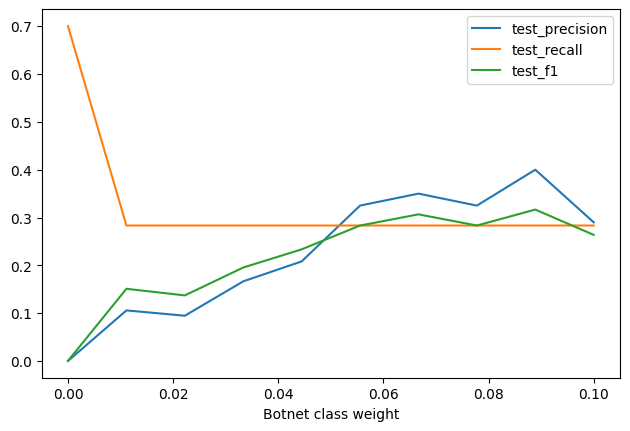

In [39]:
def apply_svm_cross_validation(X, y, svc_args={'loss': 'hinge', 'penalty': 'elasticnet', 'max_iter': 1000, 'alpha': 0.001, 'tol': 1e-3, 'random_state': 123456, 'class_weight': None}):
    clf = linear_model.SGDClassifier(**svc_args)
    cv = model_selection.ShuffleSplit(
        n_splits=10, test_size=0.1, random_state=123456)
    scores = model_selection.cross_validate(clf, X, y, cv=cv, scoring=[
                                            'precision', 'recall', 'f1'], return_train_score=True)
    print(scores)
    return [np.mean(scores['test_precision']), np.mean(scores['test_recall']), np.mean(scores['test_f1'])]


tab_class_weight = np.linspace(0, 0.1, 10)
print(tab_class_weight)

tab_score = np.array([apply_svm_cross_validation(X_train, y_train, {'loss': 'hinge', 'penalty': 'elasticnet', 'max_iter': 1000,
                     'alpha': 0.001, 'tol': 1e-3, 'random_state': 123456, 'class_weight': {0: w, 1: 1-w}}) for w in tab_class_weight])
print(tab_score)

plt.plot(tab_class_weight, tab_score[:, 0])
plt.plot(tab_class_weight, tab_score[:, 1])
plt.plot(tab_class_weight, tab_score[:, 2])
plt.legend(["test_precision", "test_recall", "test_f1"])
plt.xlabel("Botnet class weight")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("cross_validation_class_weight_svm.pdf", format="pdf")
plt.show()


In [ ]:
tab_C = np.logspace(-16, -8, 9)
tab_logC = np.log10(tab_C)
print(tab_C)
print(tab_logC)

tab_score = np.array([apply_svm_cross_validation(X_train, y_train, {
                     'loss': 'hinge', 'penalty': 'elasticnet', 'max_iter': 1000, 'alpha': C, 'tol': 1e-3, 'random_state': 123456, 'class_weight': {0: 0.044, 1: 1-0.044}}) for C in tab_C])
print(tab_score)

plt.plot(tab_logC, tab_score[:, 0])
plt.plot(tab_logC, tab_score[:, 1])
plt.plot(tab_logC, tab_score[:, 2])
plt.legend(["test_precision", "test_recall", "test_f1"])
plt.xlabel("log(alpha)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("cross_validation_alpha.pdf", format="pdf")
plt.show()
